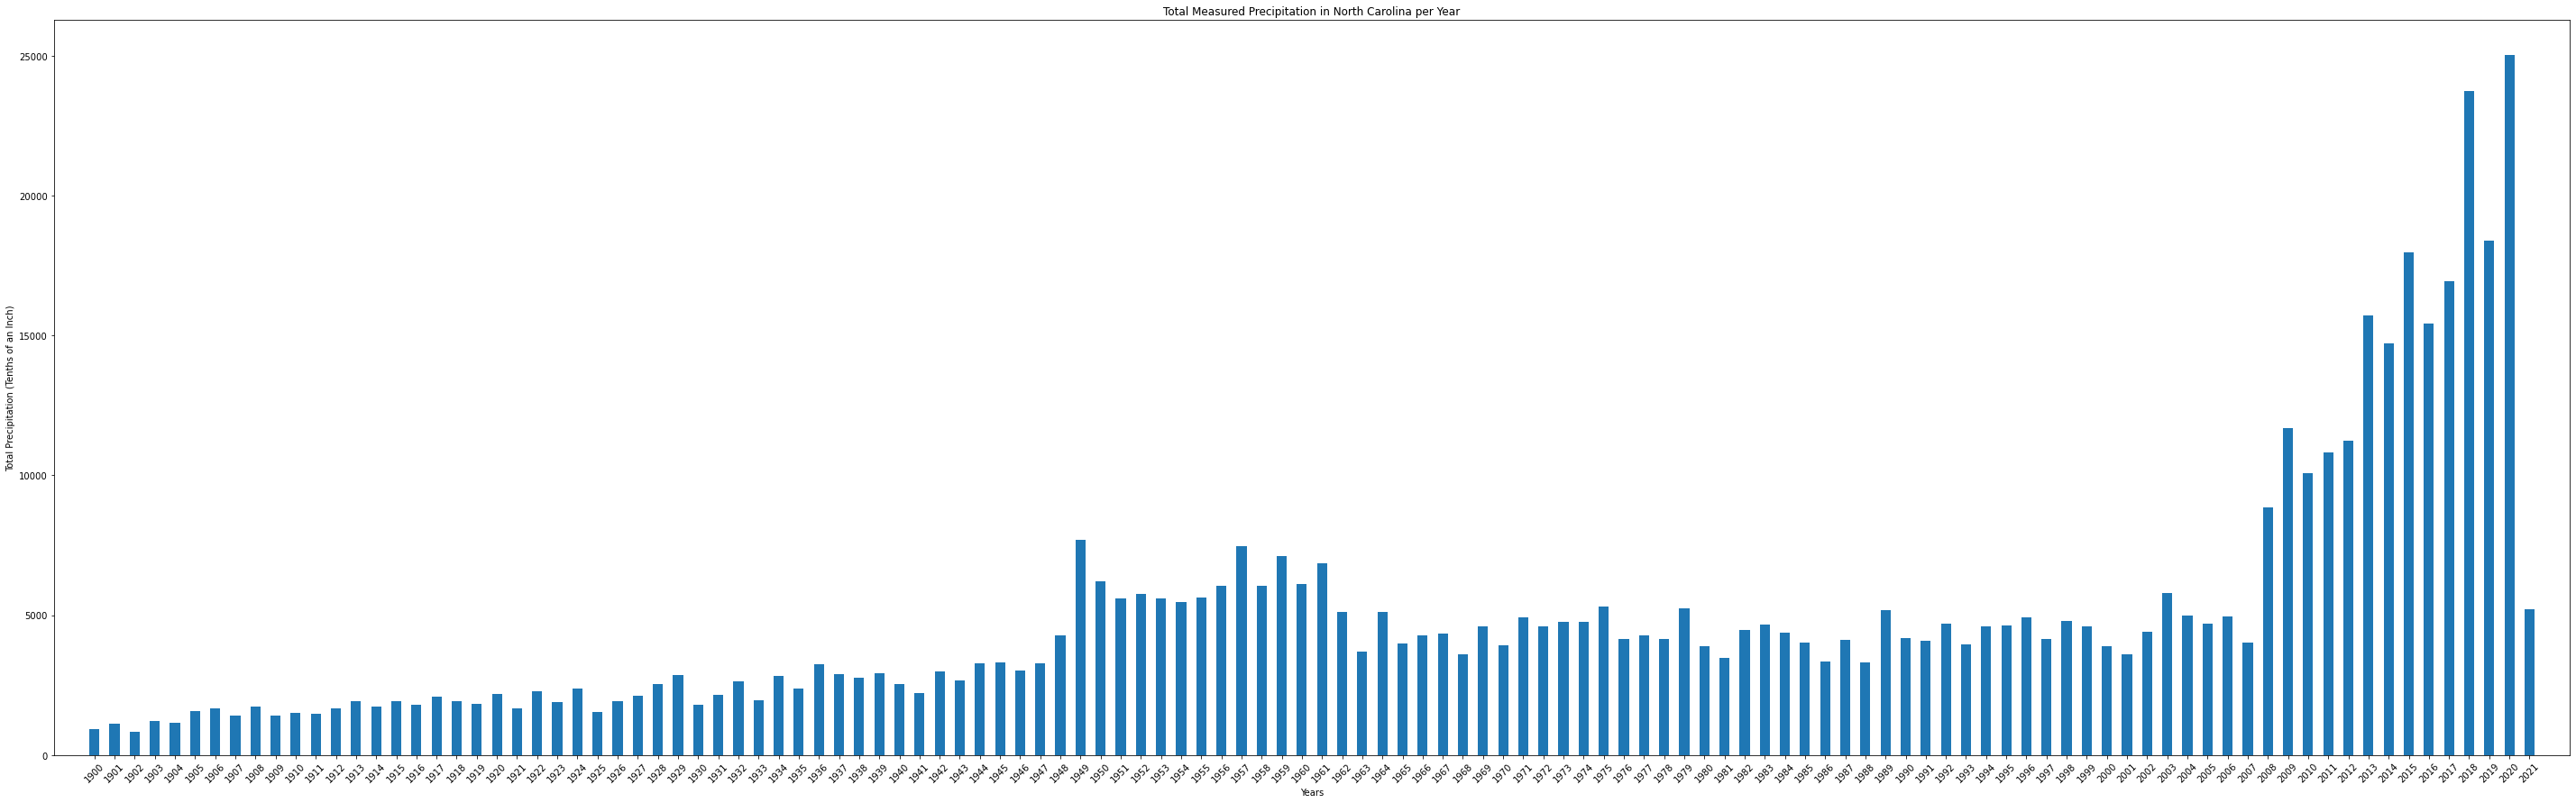

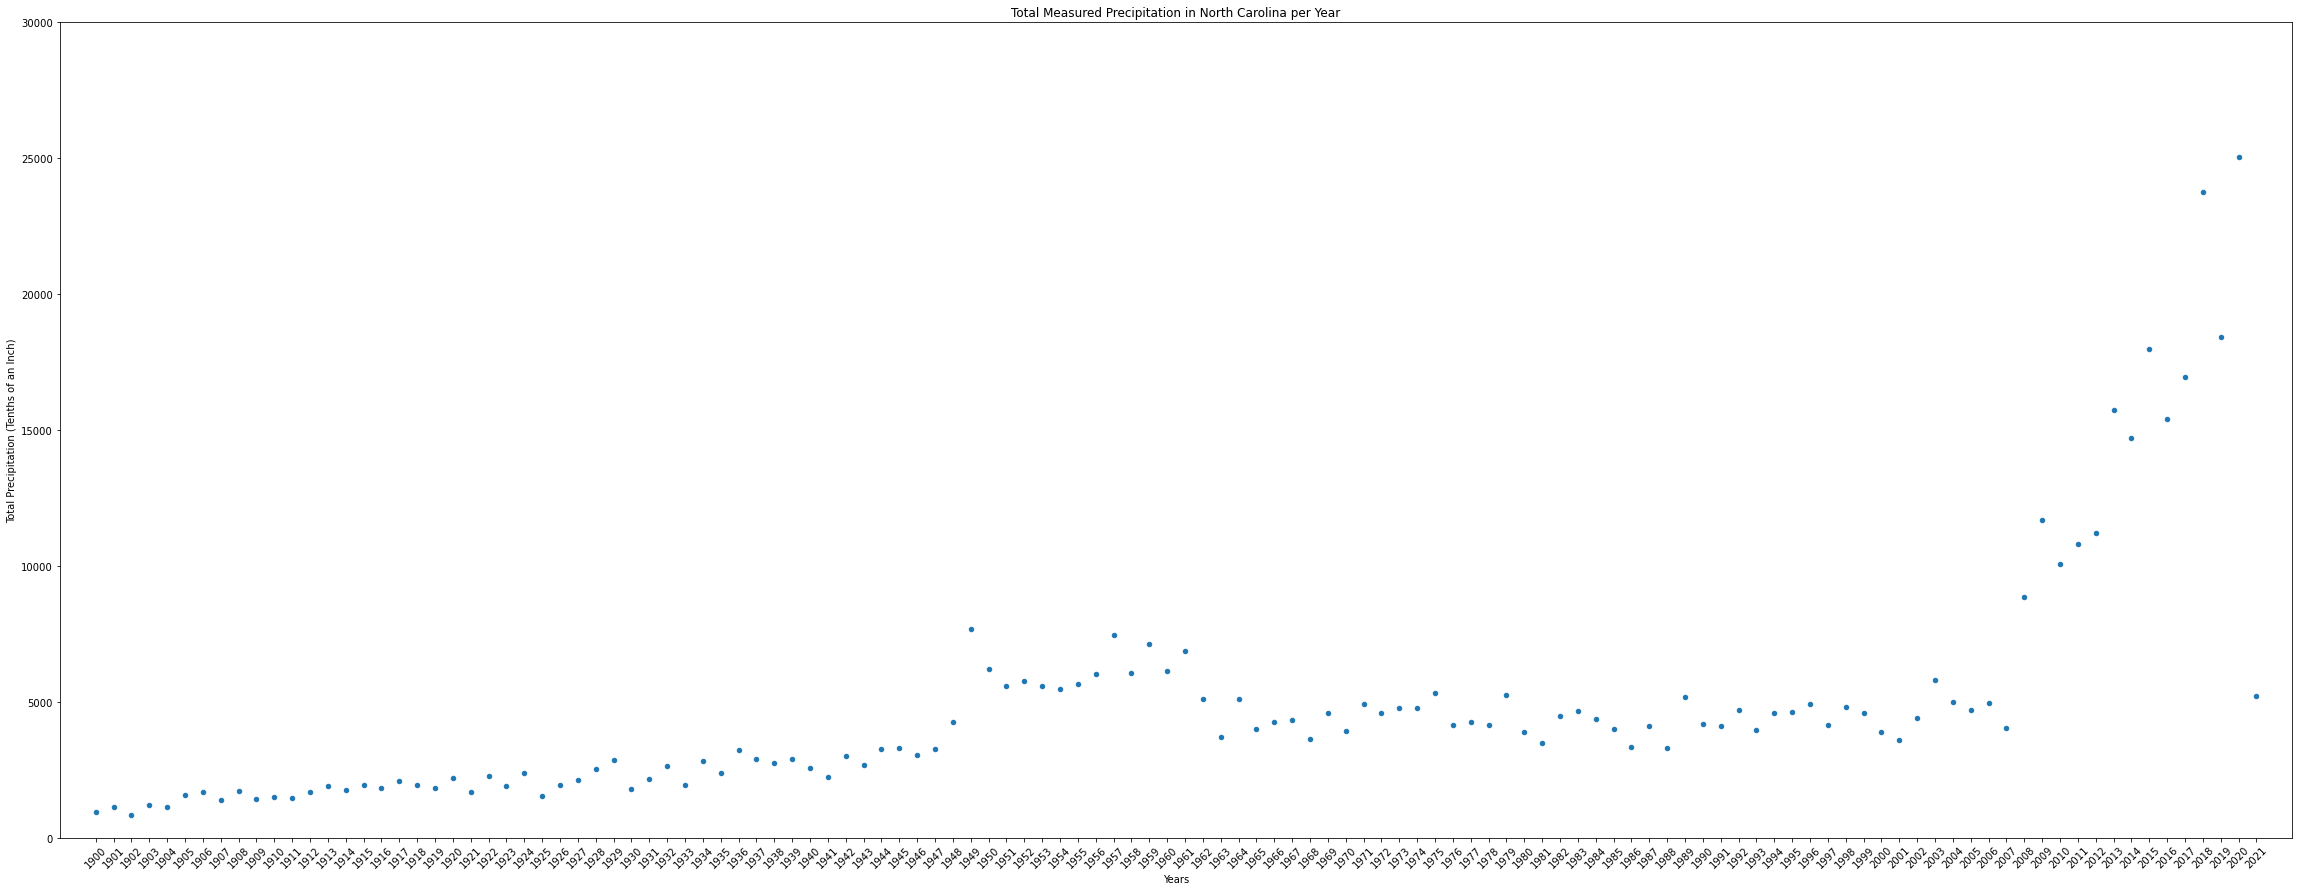

Pearson's Correlation Coefficient: 0.23
Linear Regression Equation: y = 0.01x + -6.25


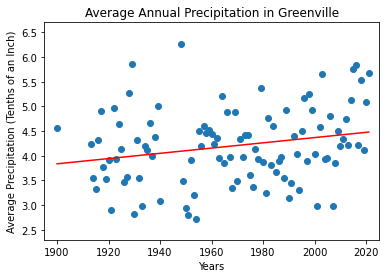

Pearson's Correlation Coefficient: 0.1
Linear Regression Equation: y = 0.0x + 0.1


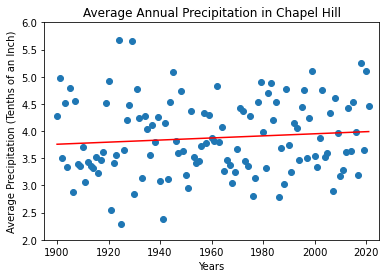

Pearson's Correlation Coefficient: 0.07
Linear Regression Equation: y = 0.0x + 0.91


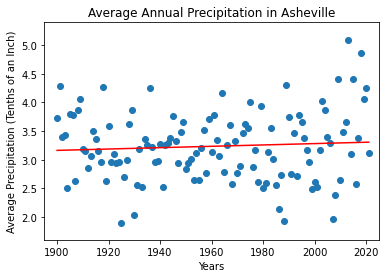

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
import datetime
import locale
from pprint import pprint
import requests


# PRECIPITATION

# Read in csv file

csv1 = "1900_thru_1950.csv"
csv2 = "1951_thru_2021.csv"

data1 = pd.read_csv(csv1)
data2 = pd.read_csv(csv2)


# Create dataframes of raw precipitation data

data1_df = pd.DataFrame(data1)

data1_df

data2_df = pd.DataFrame(data2)

data2_df


# Merge dataframes on "Station" column

raw_prec_df = pd.concat([data1_df,data2_df])

raw_prec_df


# Split month and year in "DATE" column

year_and_month_df = raw_prec_df["DATE"].str.split(pat="-", expand=True)

year_and_month_df


# Rename columns as "YEAR" and "MONTH"

year_and_month_df = year_and_month_df.rename(columns= {0: "YEAR", 1: "MONTH"})


# Add "YEAR" column to raw_prec_df

raw_prec_df["YEAR"] = year_and_month_df["YEAR"]

raw_prec_df


# Group data by year

prec_groupby_year = raw_prec_df.groupby("YEAR")


# Use sum method to calculate total measured precipitation by year

sum_annual_prec = prec_groupby_year["PRCP"].sum()

sum_annual_prec


# Reset index

sum_annual_prec = sum_annual_prec.reset_index()


# Convert total annual measured precipitation to dataframe

sum_annual_prec_df = pd.DataFrame(sum_annual_prec)


# Plot bar graph

bar_prec = sum_annual_prec_df.plot(kind="bar", figsize = (50,15), legend=False)

plt.title("Total Measured Precipitation in North Carolina per Year")

bar_prec.set_xticklabels(sum_annual_prec_df["YEAR"], rotation = 45)

plt.ylabel("Total Precipitation (Tenths of an Inch)")

plt.xlabel("Years")

plt.xlim(-2, 123)

plt.show()


# Plot scatter plot

scatter_prec = sum_annual_prec_df.plot(kind="scatter", x="YEAR", y="PRCP", figsize = (40,15))

plt.title("Total Measured Precipitation in North Carolina per Year")

scatter_prec.set_xticklabels(sum_annual_prec_df["YEAR"], rotation = 45)

plt.ylabel("Total Precipitation (Tenths of an Inch)")

plt.xlabel("Years")

plt.xlim(-2, 123)

plt.ylim(0,30000)

plt.show()


# Reference

raw_prec_df


# Isolate data from locations within NC

raw_prec_by_year_df = raw_prec_df.set_index("YEAR")

raw_prec_by_year_df


# Determine locations with data going back to 1900

raw_prec_by_year_df.loc["1900", "NAME"].unique()


# Isolate data from selected locations: 'GREENVILLE, NC US', ''ASHEVILLE, NC US', 'CHAPEL HILL 2 W, NC US'

raw_prec_by_loc_df = raw_prec_df.set_index("NAME")


# Greenville data

greenville_prec_df = raw_prec_by_loc_df.loc["GREENVILLE, NC US", :]

greenville_groupby_year = greenville_prec_df.groupby("YEAR")

greenville_avg_prec = greenville_groupby_year["PRCP"].mean()

greenville_avg_prec_df = pd.DataFrame(greenville_avg_prec)

greenville_avg_prec_df = greenville_avg_prec_df.reset_index()

greenville_avg_prec_df


# Calculate correlation coefficient

gville_years = greenville_avg_prec_df["YEAR"]
gville_years = gville_years.astype(float)

gville_avg_prec = greenville_avg_prec_df["PRCP"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(gville_years, gville_avg_prec)

#print(f"Pearson's Correlation Coefficient: {round(rvalue,2)}")


# Determine linear regression equation for chart

#print(f"Linear Regression Equation: y = {round(slope,2)}x + {round(intercept,2)}")


# Plot and print linear regression equation on chart

gville_regress = slope * gville_years + intercept


# Greenville plot

plt.scatter(gville_years, gville_avg_prec)

plt.plot(gville_years, gville_regress, "r-")

plt.title("Average Annual Precipitation in Greenville")

plt.xlabel('Years')

plt.ylabel("Average Precipitation (Tenths of an Inch)")

plt.xlim(1895, 2025)

plt.ylim(2.3, 6.7)

print(f"Pearson's Correlation Coefficient: {round(rvalue,2)}")
print(f"Linear Regression Equation: y = {round(slope,2)}x + {round(intercept,2)}")

plt.savefig("greenville.png")

plt.show()


#  Chapel Hill data

chill_prec_df = raw_prec_by_loc_df.loc["CHAPEL HILL 2 W, NC US", :]

chill_groupby_year = chill_prec_df.groupby("YEAR")

chill_avg_prec = chill_groupby_year["PRCP"].mean()

chill_avg_prec_df = pd.DataFrame(chill_avg_prec)

chill_avg_prec_df = chill_avg_prec_df.reset_index()

chill_avg_prec_df


# Calculate correlation coefficient

chill_years = chill_avg_prec_df["YEAR"]
chill_years = chill_years.astype(float)

chill_avg_prec = chill_avg_prec_df["PRCP"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(chill_years, chill_avg_prec)

#print(f"Pearson's Correlation Coefficient: {round(rvalue,2)}")


# Determine linear regression equation for chart

#print(f"Linear Regression Equation: y = {round(slope,2)}x + {round(intercept,2)}")


# Plot and print linear regression equation on chart

regress_values = slope * chill_years + intercept


# Chapel Hill plot

plt.scatter(chill_years, chill_avg_prec)

plt.plot(chill_years, regress_values, "r-")

plt.title("Average Annual Precipitation in Chapel Hill")

plt.xlabel('Years')

plt.ylabel("Average Precipitation (Tenths of an Inch)")

plt.xlim(1895, 2025)

plt.ylim(2, 6)

print(f"Pearson's Correlation Coefficient: {round(rvalue,2)}")
print(f"Linear Regression Equation: y = {round(slope,2)}x + {round(intercept,2)}")

plt.savefig("chapelhill.png")

plt.show()


# Asheville data

aville_prec_df = raw_prec_by_loc_df.loc["ASHEVILLE, NC US", :]

aville_groupby_year = aville_prec_df.groupby("YEAR")

aville_avg_prec = aville_groupby_year["PRCP"].mean()

aville_avg_prec_df = pd.DataFrame(aville_avg_prec)

aville_avg_prec_df = aville_avg_prec_df.reset_index()

aville_avg_prec_df


# Calculate correlation coefficient

aville_years = aville_avg_prec_df["YEAR"]
aville_years = aville_years.astype(float)

aville_avg_prec = aville_avg_prec_df["PRCP"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(aville_years, aville_avg_prec)

#print(f"Pearson's Correlation Coefficient: {round(rvalue,2)}")


# Determine linear regression equation for chart

#print(f"Linear Regression Equation: y = {round(slope,2)}x + {round(intercept,2)}")


# Plot and print linear regression equation on chart

aville_regress = slope * aville_years + intercept


# Asheville plot

plt.scatter(aville_years, aville_avg_prec)

plt.plot(aville_years, aville_regress, "r-")

plt.title("Average Annual Precipitation in Asheville")

plt.xlabel('Years')

plt.ylabel("Average Precipitation (Tenths of an Inch)")

plt.xlim(1895, 2025)

plt.ylim(1.6, 5.4)

print(f"Pearson's Correlation Coefficient: {round(rvalue,2)}")
print(f"Linear Regression Equation: y = {round(slope,2)}x + {round(intercept,2)}")

plt.savefig("ashville.png")

plt.show()



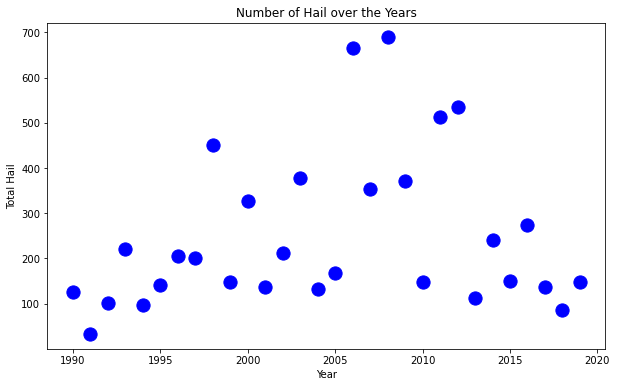

The correlation between hail over the years is 0.2
slope 3.8787541713014457
intercept -7524.862736373748
rvalue (Correlation coefficient) 0.19787212018514597
pandas (Correlation coefficient) 0.2
stderr 3.6312459640045467
y = 3.88x + -7524.86
The r-squared is: 0.03915337594656485


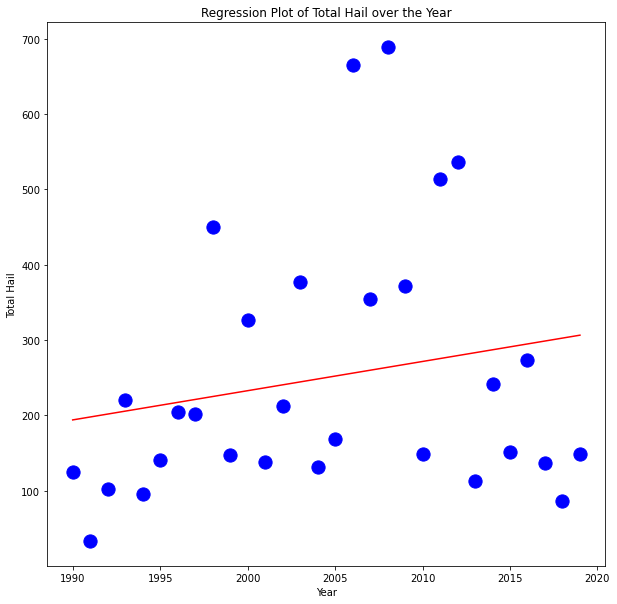

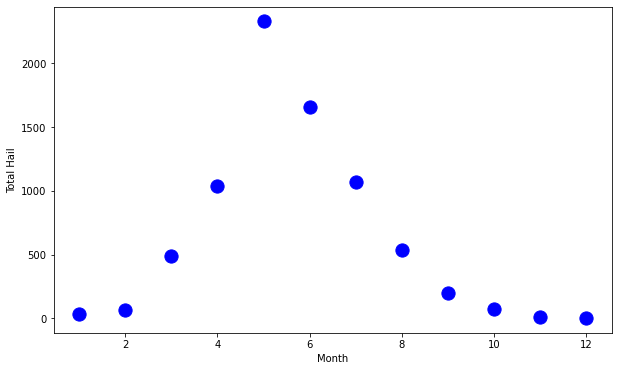

The correlation between hail over the months is -0.23
slope -48.24125874125875
intercept 938.8181818181819
rvalue (Correlation coefficient) -0.2306504508811558
pandas (Correlation coefficient) -0.23
stderr 64.35666529764548
y = -48.24x + 938.82
The r-squared is: 0.053199630491680465


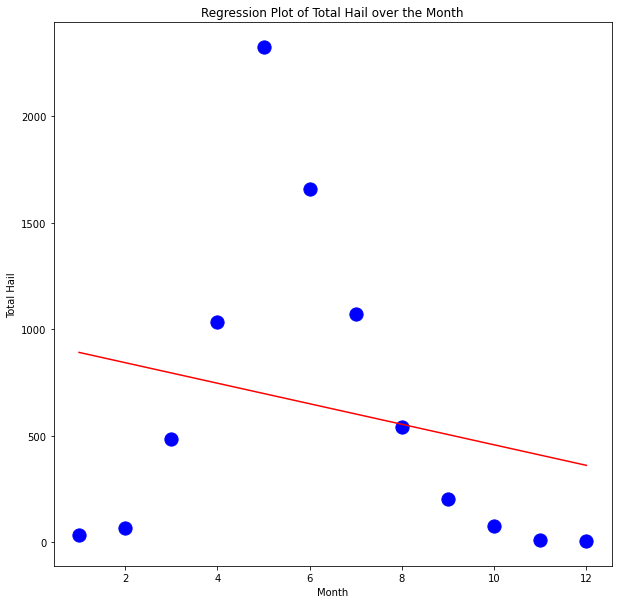

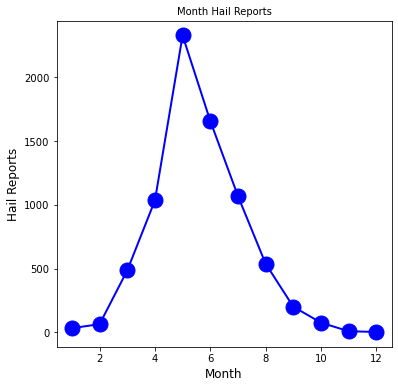

In [2]:
# HAIL

state_data = "data/hail_reports_2.csv"


state = pd.read_csv(state_data)
state_df = pd.DataFrame(state)

state_df.head()

state_df.nunique()

state_df['Observation Time'].nunique

date = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date() for date in state_df.loc[:,"Observation Time"]] 
value = state_df.loc[:,"Observation Time"] 
value.head()

state_df['Year'] = pd.DatetimeIndex(state_df['Observation Time']).year
state = (state_df.groupby(['Year']).size().reset_index(name = "hail size"))
state

fig1, ax1 = plt.subplots(figsize=(10, 6))
total_hail =(state_df.groupby(['Year']).size().reset_index(name = "hail reports"))

marker_size=15
plt.scatter(total_hail['Year'],total_hail['hail reports'],s=175, color="blue")
plt.title('Number of Hail over the Years',fontsize =12)
plt.xlabel('Year',fontsize =10)
plt.ylabel('Total Hail',fontsize =10)
plt.show()

corr=round(sts.pearsonr(total_hail['Year'],total_hail['hail reports'])[0],2)
print(f"The correlation between hail over the years is {corr}")

x_values = total_hail['Year']
y_values = total_hail['hail reports']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print("slope", slope)
print("intercept", intercept)
print("rvalue (Correlation coefficient)", rvalue)
print("pandas (Correlation coefficient)", corr)
print("stderr", stderr)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Total Hail over the Year',fontsize =12)
plt.xlabel('Year',fontsize =10)
plt.ylabel('Total Hail',fontsize =10)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show

plt.savefig("data/YearHail.png")
plt.show()

state_df['Month'] = pd.DatetimeIndex(state_df['Observation Time']).month
state = (state_df.groupby(['Month']).size().reset_index(name = "hail reports "))
state

fig1, ax1 = plt.subplots(figsize=(10, 6))
total_hail =(state_df.groupby(['Month']).size().reset_index(name = "hail reports"))

marker_size=15
plt.scatter(total_hail['Month'],total_hail['hail reports'],s=175, color="blue")
plt.title('',fontsize =12)
plt.xlabel('Month',fontsize =10)
plt.ylabel('Total Hail',fontsize =10)
plt.show()

corr=round(sts.pearsonr(total_hail['Month'],total_hail['hail reports'])[0],2)
print(f"The correlation between hail over the months is {corr}")

x_values = total_hail['Month']
y_values = total_hail['hail reports']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print("slope", slope)
print("intercept", intercept)
print("rvalue (Correlation coefficient)", rvalue)
print("pandas (Correlation coefficient)", corr)
print("stderr", stderr)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Total Hail over the Month',fontsize =12)
plt.xlabel('Month',fontsize =10)
plt.ylabel('Total Hail',fontsize =10)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show

plt.savefig("data/MonthHail.png")
plt.show()

forline_df = (state_df.groupby(['Month']).size().reset_index(name = "hail reports"))
forline_df.head()

x_axis = forline_df['Month']
report = forline_df["hail reports"]

fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Month Hail Reports',fontsize =10)
plt.plot(x_axis, report,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Month',fontsize =12)
plt.ylabel('Hail Reports',fontsize =12)

plt.savefig("data/MonthHailLine.png")
plt.show()



['1990-07-01 18:01:00' '1990-07-01 19:15:00' '1990-08-20 15:13:00' ...
 '2019-10-31 18:49:00' '2019-10-31 19:00:00' '2019-10-31 23:11:00']
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


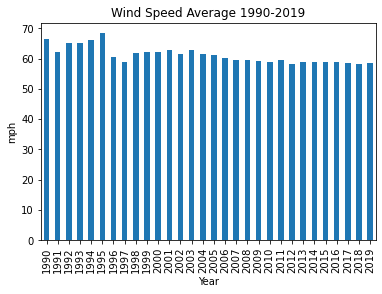

['1/25/2010 3:07' '1/25/2010 3:12' '1/25/2010 3:15' ... '10/31/2019 18:49'
 '10/31/2019 19:00' '10/31/2019 23:11']
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


<Figure size 432x288 with 0 Axes>

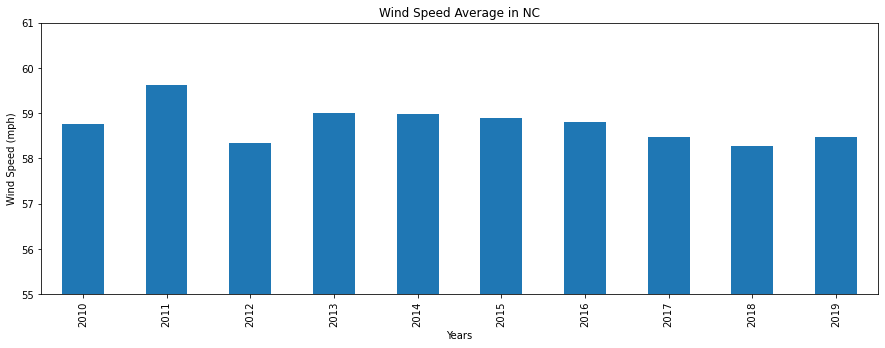

In [3]:
# WINDS

# Load in csv
wind_reports_string = 'wind_reports.csv'
wind_reports_df = pd.read_csv(wind_reports_string)

wind_reports_df




# Group data by year

print(wind_reports_df["Observation Time"].unique())

wind_reports_groupby_year = wind_reports_df.groupby("Observation Time")

# Split month and year in "DATE" column

year_and_month_df = wind_reports_df["Observation Time"].str.split(pat="-", expand=True)

year_and_month_df

# Rename columns as "YEAR" and "MONTH"

year_and_month_df = year_and_month_df.rename(columns= {0: "YEAR", 1: "MONTH"})

# Add "YEAR" column to raw_prec_df

wind_reports_df["YEAR"] = year_and_month_df["YEAR"]

wind_reports_df

# Split month and year in "DATE" column
wind_reports_df['Year']= pd.DatetimeIndex(wind_reports_df['Observation Time']).year
wind_reports_df

# Group data by year

print(wind_reports_df["Year"].unique())

prec_groupby_year = wind_reports_df.groupby("Year")

# Use sum method to calculate total wind speed  by year

average_annual_wind_speed = prec_groupby_year["Wind Speed (mph)"].mean()

average_annual_wind_speed

average_wind_speed_df = pd.DataFrame({'annual wind speed': average_annual_wind_speed})
average_wind_speed_df

# Create a bar chart based off of the group series from before
count_chart = average_annual_wind_speed.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Year")
count_chart.set_ylabel("mph")

plt.title('Wind Speed Average 1990-2019')

plt.show()
plt.tight_layout()

# Load in csv
wind_string = 'wind.csv'
wind_df = pd.read_csv(wind_string)

wind_df

# Group data by year

print(wind_df["Observation Time"].unique())

wind_groupby_year = wind_df.groupby("Observation Time")

# Split month and year in "DATE" column

year_and_month_df = wind_df["Observation Time"].str.split(pat="-", expand=True)

year_and_month_df

# Rename columns as "YEAR" and "MONTH"

year_and_month_df = year_and_month_df.rename(columns= {0: "YEAR", 1: "MONTH"})

# Add "YEAR" column to raw_prec_df

wind_df["YEAR"] = year_and_month_df["YEAR"]

wind_df

# Split month and year in "DATE" column
wind_df['Year']= pd.DatetimeIndex(wind_df['Observation Time']).year
wind_df

# Group data by year

print(wind_df["Year"].unique())

prec_groupby_year = wind_df.groupby("Year")

# Use sum method to calculate total wind speed  by year

total_annual_wind_speed = prec_groupby_year["Wind Speed (mph)"].mean()

total_annual_wind_speed

total_wind_speed_df = pd.DataFrame({'annual wind speed': total_annual_wind_speed})
total_wind_speed_df

total_wind_speed_df.reset_index()

# Create a bar chart based off of the group series from before
#count_chart = count_Observation_Time.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Year")
count_chart.set_ylabel("")


plt.show()
plt.tight_layout()

# Plot bar graph

bar_prec = total_annual_wind_speed.plot(kind="bar", figsize = (15,5), legend=False)

plt.title("Wind Speed Average in NC")

#bar_prec.set_xticklabels(total_wind_speed_df['Year'], rotation = 45)

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Years")

plt.ylim(55,61)

plt.show()

Text(0.5, 1.0, 'Monetary Loss From Tornado Damages Over 40 Years')

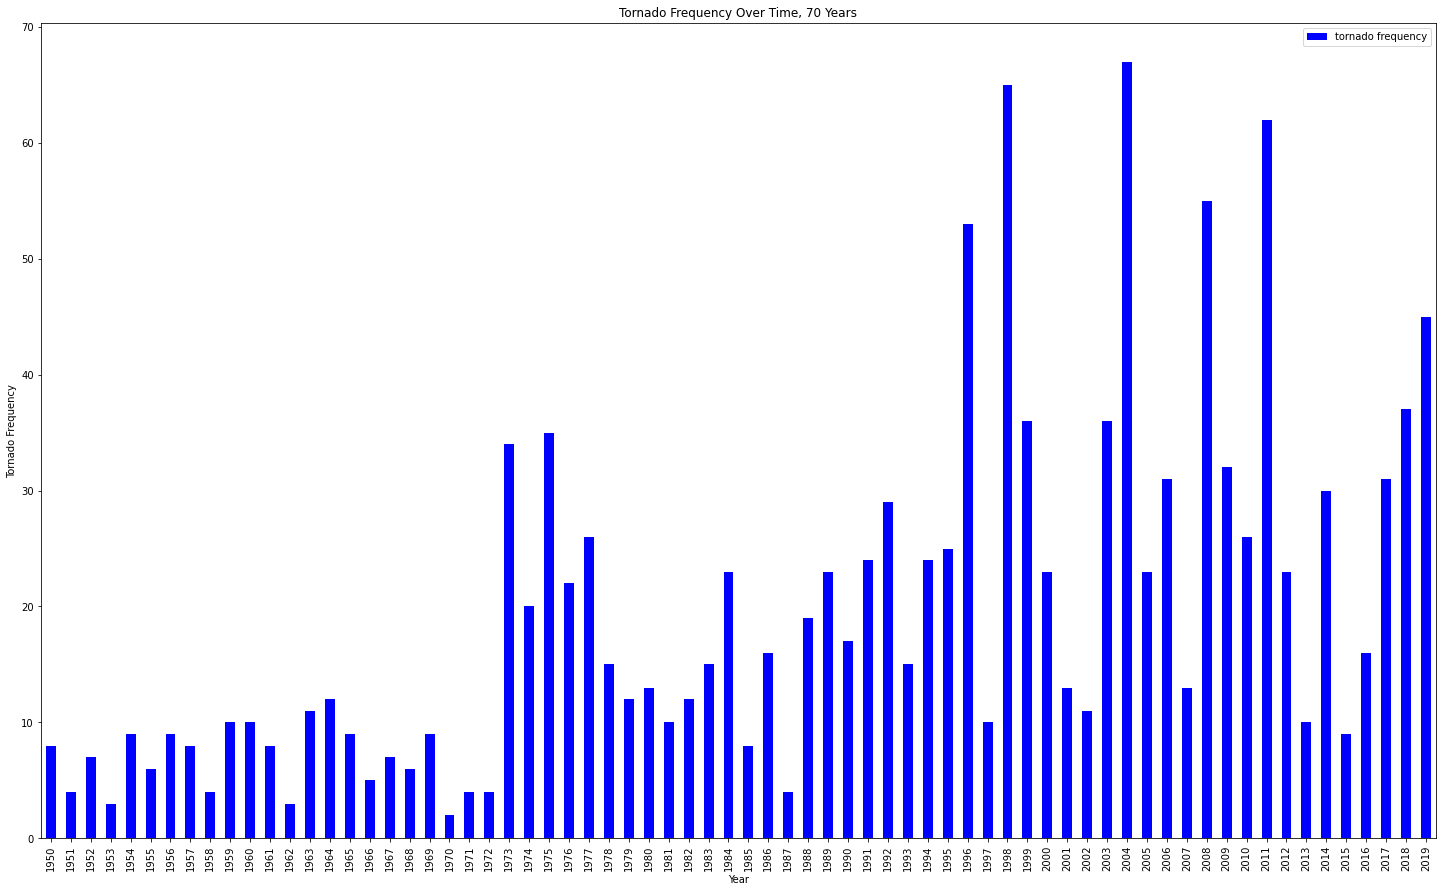

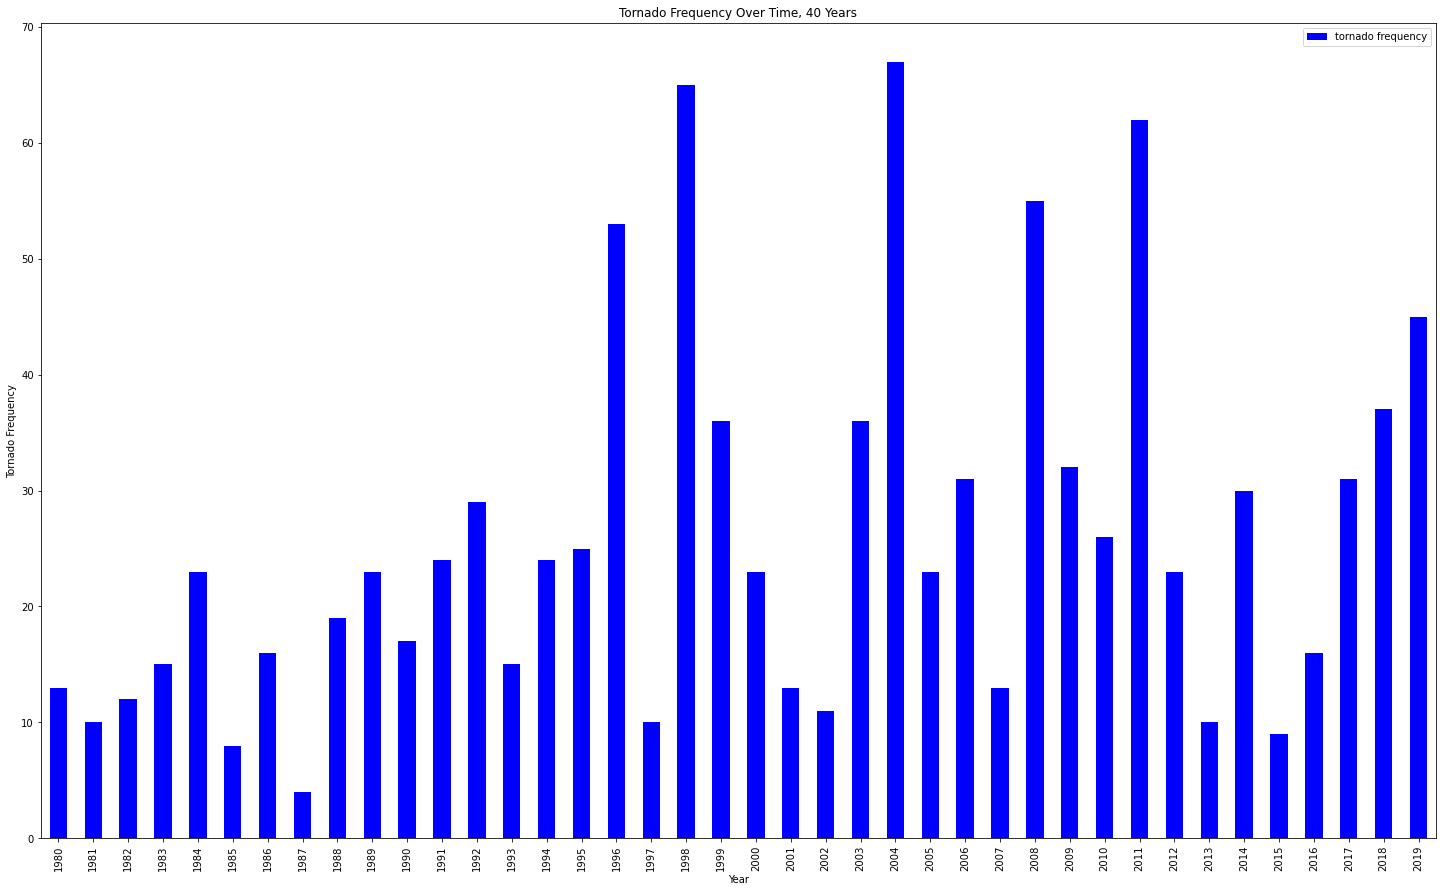

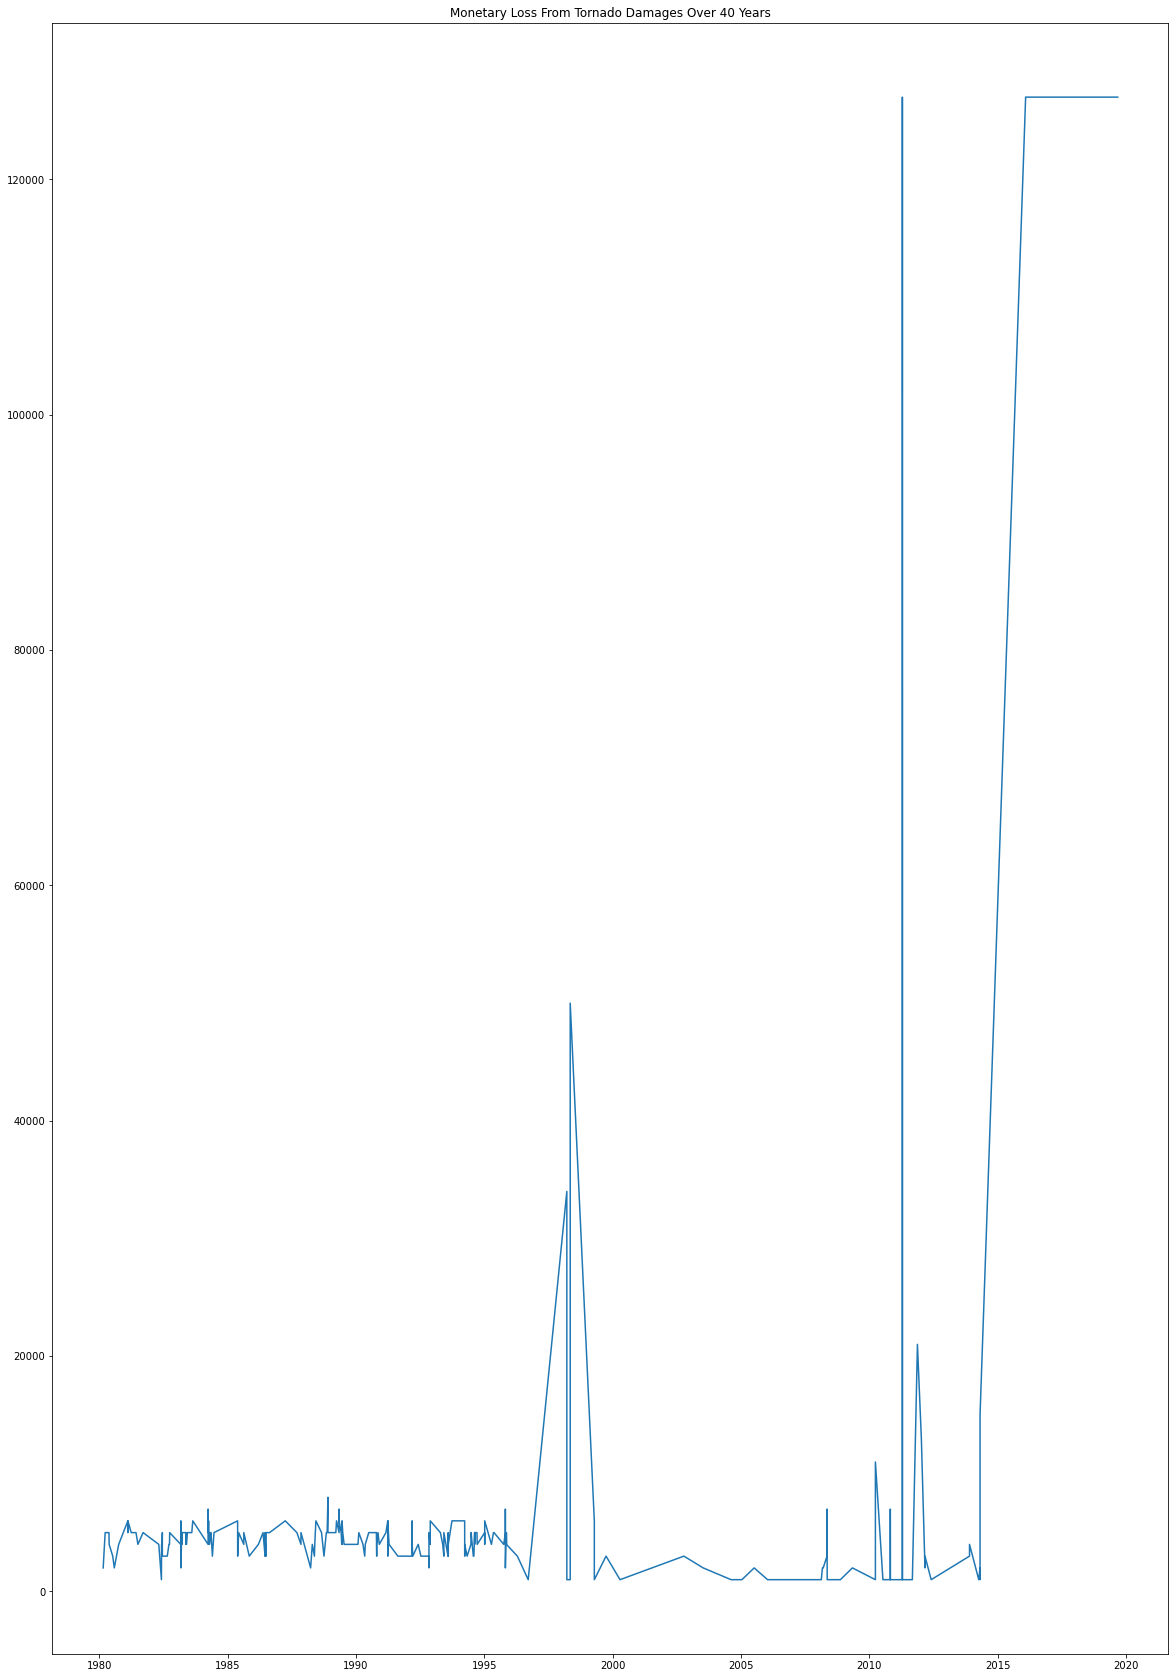

In [4]:
# TORNADOES

#read in data recorded for 70 years
tor70Path = "70YearTornadoReport.csv"
tor70= pd.read_csv(tor70Path)
tor70.head()

#checking the number of tornadoes from data recorded for 70 years
num_tornadoes = tor70["Observation Time"].nunique()
num_tornadoes




#allows for dates to be utilized later on in graphs
date_objects = [datetime.datetime.strptime(date, '%m/%d/%Y %H:%M').date() for date in tor70.loc[:,"Observation Time"]] 
values = tor70.loc[:,"Observation Time"]
values.head()

#bar graph on frequency of tornadoes over time
tor70['Year'] = pd.DatetimeIndex(tor70['Observation Time']).year
tor70Grouped = (tor70.groupby(['Year']).size().reset_index(name = "tornado frequency"))



tor70Plot = tor70Grouped.plot.bar(title = "Tornado Frequency Over Time, 70 Years", x = "Year", y = "tornado frequency", color = "blue", figsize = (25, 15))
tor70Plot.set_ylabel("Tornado Frequency")




##read in data recorded for 40 years
tor40Path = "40YearTornadoReport.csv"
tor40 = pd.read_csv(tor40Path)
tor40.head()

#allows for dates to be utilized later on in graphs(40 years)
date_objects = [datetime.datetime.strptime(date, '%m/%d/%Y %H:%M').date() for date in tor40.loc[:,"Observation Time"]] 
values = tor40.loc[:,"Observation Time"]
values.head()

#bar graph on frequency of tornados over time(40 years)
tor40['Year'] = pd.DatetimeIndex(tor40['Observation Time']).year
tor40Grouped = (tor40.groupby(['Year']).size().reset_index(name = "tornado frequency"))



tor40Plot = tor40Grouped.plot.bar(title = "Tornado Frequency Over Time, 40 Years", x = "Year", y = "tornado frequency", color = "blue", figsize = (25, 15))
tor40Plot.set_ylabel("Tornado Frequency")

##eliminate values of Monetary Loss that are $0 or unkown(making assumption that if a tornado caused even the slightest form of environmental damage, there must be some cost)
tor40.drop(tor40.index[tor40['Monetary Loss'] == "$0 or unknown"], inplace = True)
tor40.head()

##line graph on cost in terms of monetary loss from tornado damages over time
tor40.drop(tor40.index[tor40['Monetary Loss'] == "$0 or unknown"], inplace = True)
dates = tor40.loc[:,"Observation Time"]
dateVals = []

for date in dates:
    dateVals.append(datetime.datetime.strptime(date, '%m/%d/%Y %H:%M'))
    
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')    
    

damageCost = []


for line in tor40["Monetary Loss"]:
    damageCost.append(locale.atof(line.strip("$")))
    

plt.figure(figsize = (20,30))
plt.plot(dateVals, damageCost)
plt.title("Monetary Loss From Tornado Damages Over 40 Years")

{'data': [{'begDate': 19800601,
           'deaths': 1260,
           'disaster': 'Drought',
           'endDate': 19801130,
           'name': 'Central/Eastern Drought/Heatwave (Summer-Fall 1980)',
           'totalCost': '33867.6'},
          {'begDate': 19820108,
           'deaths': 85,
           'disaster': 'Winter Storm',
           'endDate': 19820116,
           'name': 'Midwest/Southeast/Northeast Winter Storm, Cold Wave '
                   '(January 1982)',
           'totalCost': '1846.9'},
          {'begDate': 19830601,
           'deaths': 0,
           'disaster': 'Drought',
           'endDate': 19830831,
           'name': 'Southeast Drought (Summer 1983)',
           'totalCost': '7973.3'},
          {'begDate': 19831215,
           'deaths': 151,
           'disaster': 'Freeze',
           'endDate': 19831225,
           'name': 'Freeze, Cold Wave (December 1983)',
           'totalCost': '5395.7'},
          {'begDate': 19840327,
           'deaths': 80,
         

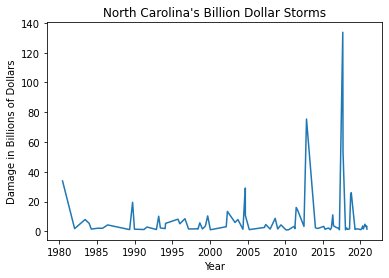

In [5]:
# STORMS

url = 'https://www.ncdc.noaa.gov/billions/events-NC-1980-2020.json'
data = requests.get(url).json()
pprint(data)


startdates=[]
costs=[]
for storm in data["data"]:
    Date=storm["begDate"]
    convertedDate=datetime.date(int(str(Date)[0:4]),int(str(Date)[4:6]),int(str(Date)[6:]))
    startdates.append(convertedDate)
    costs.append(float(storm["totalCost"])/1000)
    
    
    

costs

startdates=sorted(startdates)

plt.plot(startdates,costs)
plt.xlabel('Year')
plt.ylabel('Damage in Billions of Dollars')
plt.title("North Carolina's Billion Dollar Storms")
plt.savefig("billion_graph.png")